# HW Bouns

## 1.(15%)

In [52]:
def function(x, F):
  return 0.2 + 25*x - 200*(x**2) + 675*(x**3) - (0 if F == "f1" else 900*(x**4))
def functionIntegral(x, F):
  return 0.2*x + 25/2*(x**2) - 200/3*(x**3) + 675/4*(x**4) - (0 if F == "f1" else 180*(x**5))
def Output(Function, GroundTruth, Approx):
  print(Function,"Integrating Result:")
  print("Ground Truth\t  \t:%3.5f"%GroundTruth)  
  print("Approximate Result\t:%3.5f"%Approx)
  print("Error Rate\t  \t:%2.3f"%(100-100*Approx/GroundTruth),"\b%")
Output("f1", functionIntegral(0.8, "f1")-functionIntegral(0, "f1"), 2/5*(function((6+2*(3**0.5))/15,"f1")+function((6-2*(3**0.5))/15,"f1")))
Output("f2", functionIntegral(0.8, "f2")-functionIntegral(0, "f2"), 2/5*(function((6+2*(3**0.5))/15,"f2")+function((6-2*(3**0.5))/15,"f2")))

f1 Integrating Result:
Ground Truth	  	:43.14667
Approximate Result	:43.14667
Error Rate	  	:0.000 %
f2 Integrating Result:
Ground Truth	  	:-15.83573
Approximate Result	:-14.19733
Error Rate	  	:10.346 %


## 2.

1. The pixel intensity in pcMRI alone represents the flow velocity; and the magMRI can be used to better define the region of SSS. Therefore, you don't multiply magMRI with pcMRI; instead you define the region of the integral with magMRI and find the integral over SSS.
2. Time integral means that you'll find the integral along with time. In (a) you find the time varying flow velocity over the SSS region, let's say Flow(t), and to find the flow rate you have to take time into consideration, like ∫Flow(t)dt. Meanwhile, to convert flow velocity to flow rate, you'll need the cross-section area as well. 

mag代表的是生理結構的影像，不是流量喔。看到影像應該可以找到血管的位置和大小(我找不到QQ)。所以要取得面積，得要看有多少像素（具有夠強的信號強度），再乘上每個像素的面積。

In [53]:
from matplotlib import pyplot as plt
import cv2
from scipy import integrate
import numpy as np

#Read File
Size, DataNum = 256, 51
mag = np.zeros((DataNum,Size,Size),np.float32)
pc = np.zeros((DataNum,Size,Size),np.float32)
time = np.array(range(DataNum))
for i in range(DataNum):
  with open(r"magMRI/magMRI_frame"+(str(i+1) if i+1 > 9 else "0"+str(i+1))+".dat") as datFile:
    j = 0
    for EachRow in datFile:
      mag[i][j] = np.array(EachRow.split(), dtype = np.float32)
      j += 1
  with open(r"pcMRI/pcMRI_frame"+(str(i+1) if i+1 > 9 else "0"+str(i+1))+".dat") as datFile:
    j = 0
    for EachRow in datFile:
      pc[i][j] = np.array(EachRow.split(), dtype = np.float32)
      j += 1

## a. Perform spatial integration over the SSS region

In [54]:
SSSregion = integrate.simpson([integrate.simpson(mag_x, list(range(Size))) for mag_x in mag], list(range(Size)))/(220**2)
print(SSSregion)
count, cmp = 0, 0
for i in range(Size):
  for j in range(Size):
    if pc[1][i][j] > 39:
      #print(i, j)
      count += 1
      if i > 100 and i < 150 and j > 200:
        cmp += 1
print(count, cmp)
# I have no idea to find SSS in pc

[89.75272383 89.7969037  89.67562787 89.8178399  89.38477574 89.82545125
 90.00968563 90.1980204  90.05014807 90.17693985 90.36503673 90.63492941
 90.79598471 90.67000115 90.59076891 90.78611599 90.13603693 90.3187919
 90.08032584 90.11897785 89.89463039 89.65138057 89.97013458 89.83522239
 90.02733572 89.5210553  89.8158989  89.71908273 90.00158847 89.98202207
 89.76684085 89.84625029 89.64911014 89.73434473 90.05022239 89.79376822
 90.17627095 89.99549128 89.98544766 90.39079144 89.92015137 89.82827953
 89.90290978 89.79393939 89.88559573 89.78184272 89.62127812 89.85349274
 89.72345027 90.02061481 89.85282211]
354 21


## b.(15%)

In [55]:
re = pc.reshape(Size,Size,DataNum)
for n in range(DataNum):
  for i in range(Size):
    for j in range(Size):
      re[i][j][n] = pc[n][i][j]

In [56]:
ResultSimpson = np.zeros((Size,Size),np.float32)
ResultTrapezoid = np.zeros((Size,Size),np.float32)
for i in range(Size):
  for j in range(Size):
    ResultSimpson[i][j] = integrate.simpson(re[i][j], np.array(range(DataNum))/50)
    ResultTrapezoid[i][j] = integrate.trapezoid(re[i][j], np.array(range(DataNum))/50)

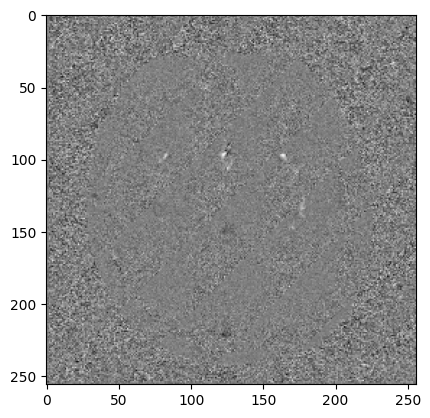

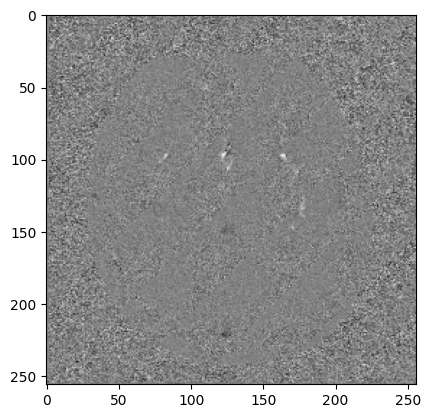

In [57]:
# each pixel integrate by time
plt.imshow(ResultSimpson, cmap = 'gray')
plt.show()
plt.imshow(ResultTrapezoid, cmap = 'gray')
plt.show()

In [ ]:
#Slide Test Case
T = [[72,64,24],[54,70,54],[0,40,48]]
x = [0, 4, 8]
y = [0, 3, 6]
print(integrate.trapezoid([integrate.trapezoid(T_x, x) for T_x in T], y)/(6*8))
print(integrate.simpson([integrate.simpson(T_x, x) for T_x in T], y)/(6*8))

53.0
58.666666666666664


## 4.(20%)

In [51]:
Data = [(0,0),(2,0.7),(4,1.8),(6,3.4),(8,5.1),(10,6.3),(12,7.3),(14,8.0),(16,8.4)]
i = 5
print("By Forward finite-difference method")
print("velocity\t:%.3f"%((-Data[i+2][1]+4*Data[i+1][1]-3*Data[i][1])/(2*(Data[i+1][0]-Data[i][0]))))
print("acceleration\t:%.3f"%((-Data[i+3][1]+4*Data[i+2][1]-5*Data[i+1][1]+2*Data[i][1])/((Data[i+1][0]-Data[i][0])**2)))
print("By Centered finite-difference method")
print("velocity\t:%.3f"%((-Data[i+2][1]+8*Data[i+1][1]-8*Data[i-1][1]+Data[i-2][1])/(12*(Data[i+1][0]-Data[i][0]))))
print("acceleration\t:%.3f"%((-Data[i+2][1]+16*Data[i+1][1]-30*Data[i][1]+16*Data[i-1][1]-Data[i-2][1])/(12*((Data[i+1][0]-Data[i][0])**2))))

By Forward finite-difference method
velocity	:0.575
acceleration	:-0.075
By Centered finite-difference method
velocity	:0.542
acceleration	:-0.042
